# **PROJECT TITLE: EDA**


I used a real time dataset retail_sales_dataset.csv for executing the explanatory data anakysis task.

# **Meaningfull questions about dataset:**
1.Which product categories generate the most revenue?
2.How does sales performance vary over months?
3.Are there any trends based on gender or age group?
4.Which age group spends the most?
5.Do male and female customers differ in average quantity purchased?
6.Are there any invalid or suspicious data entries?

# **Load the dataset**

In [ ]:
import pandas as pd
df = pd.read_csv('retail_sales_dataset.csv')
df.head() #first 5 rows
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


# **Understanding the data**


In [ ]:
print("Rows:", df.shape[0], "Columns:", df.shape[1]) #shows the shape of dataset

print(df.dtypes) #Column names and types

df.describe(include='all') #Summary of numerical and categorical data

df.isnull().sum() #Check for missing values

print(df.columns)



Rows: 1000 Columns: 9
Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object
Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


Interpretation:
this dataset contains 9 columns and 1000 rows, here we are taking look at the first five rows.
Key variables include: Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, and Total Amount.
There are no null values.
All the datatypes are suitable for analysis.

# **Cleaning Data**

In [ ]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for invalid data (negative quantity or price)
print(df[(df['Quantity'] <= 0) | (df['Price per Unit'] <= 0)])



Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []


# **Q1: What are the top-selling product categories?**

---



<Axes: title={'center': 'Top Selling Product Categories'}, xlabel='Product Category'>

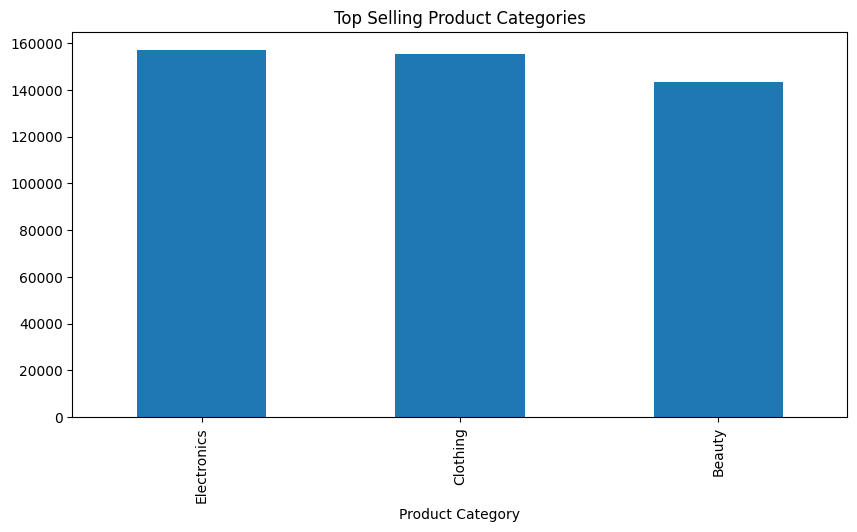

In [ ]:
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
top_products.plot(kind='bar', title='Top Selling Product Categories', figsize=(10,5))


interpretation:
The top selling categories are electronics and later clothing for all genders and ages. The least is beauty.

# **Q2: What does monthly sales trend look like?**

/tmp/ipython-input-337483681.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Total Amount'].resample('M').sum()


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Date'>

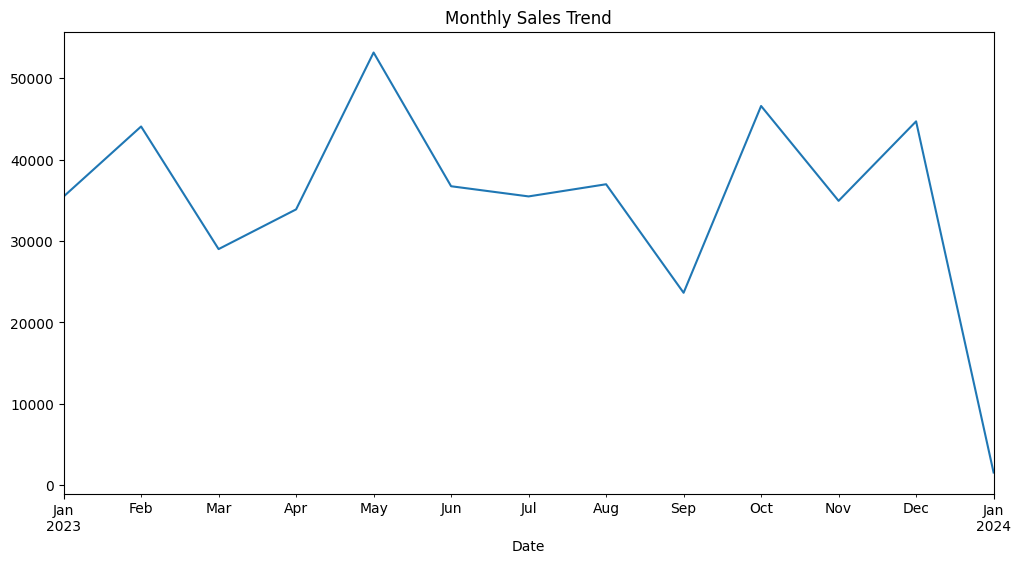

In [ ]:
df.set_index('Date', inplace=True)
monthly_sales = df['Total Amount'].resample('M').sum()
monthly_sales.plot(title='Monthly Sales Trend', figsize=(12,6))


interpretation:
The monly sales trend is not the same for every month the sales keep changing and the trend goes up and down and in the end during jan 2024 the sales trend comes to 0.

# **Q3: Gender-based spending analysis**

<Axes: title={'center': 'Sales by Gender'}, xlabel='Gender'>

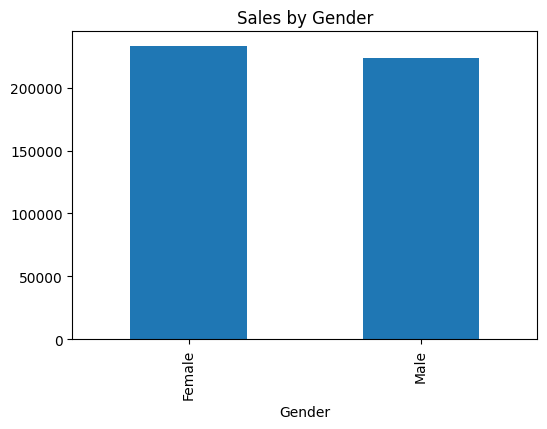

In [ ]:
gender_sales = df.groupby('Gender')['Total Amount'].sum()
gender_sales.plot(kind='bar', title='Sales by Gender', figsize=(6,4))


interpretation:
according to the above analysis it is seen that theres only slight difference between males and females gender based spending. The females spend slightly more than males.

# **Q4: Which age group spends the most?**




/tmp/ipython-input-2973612833.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby('Age Group')['Total Amount'].sum()


<Axes: title={'center': 'Sales by Age Group'}, xlabel='Age Group'>

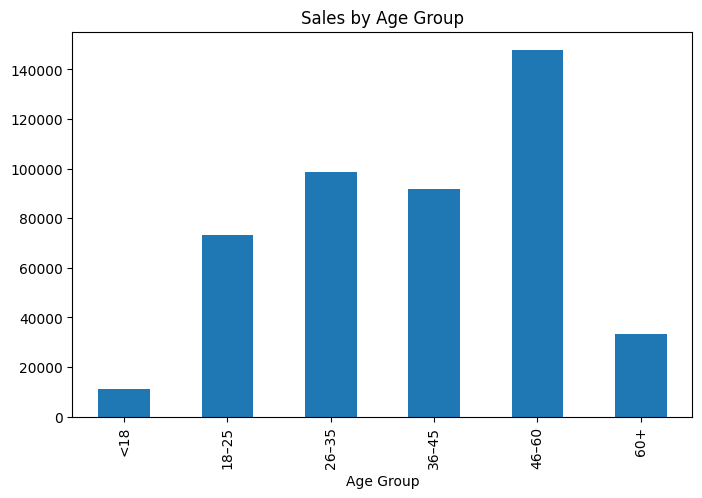

In [ ]:
# Create age bins
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18–25', '26–35', '36–45', '46–60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_sales = df.groupby('Age Group')['Total Amount'].sum()
age_sales.plot(kind='bar', title='Sales by Age Group', figsize=(8,5))


Interpretation:
The age group between 40-60 spend more compared to other age groups.And people below age 18 are least buyers.

# **Q5: Any duplicate transactions?**

In [ ]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


interpretation:
There are no duplicate rows.

# **Q6: Do men and women purchase the same quantity on average?**

In [ ]:
df.groupby('Gender')['Quantity'].mean()


,Quantity
Gender,
Female,2.545098
Male,2.481633


interpretation:
On an average females purchase more quantity than males.

# **Summary**

The dataset contains 1000 retail transactions with information on date, customer, product category, quantity, price, and total amount.
There are no missing values or duplicate transactions in the dataset.
The top-selling product categories are Electronics, Clothing, and Beauty.
Monthly sales show some fluctuation throughout the year, with a peak in May and October and a dip in September.
Females contribute slightly more to total sales than males.
The age group 46-60 spends the most, followed by 26-35 and 36-45.
On average, the quantity purchased by males and females is very similar.
